# Gabi tester datavisualisering 

In [1]:
#hello

In [2]:
import pandas as pd
pd.set_option("display.max_columns", None)
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure


In [3]:
#Start here and load the dataframe
df = pd.read_csv("dropped_col_df.csv")

In [71]:
df.head()

,Unnamed: 0,COD_S11,GENDER,EDU_FATHER,EDU_MOTHER,OCC_FATHER,OCC_MOTHER,STRATUM,SISBEN,PEOPLE_HOUSE,REVENUE,JOB,SCHOOL_NAME,SCHOOL_NAT,SCHOOL_TYPE,MAT_S11,CR_S11,CC_S11,BIO_S11,ENG_S11,Cod_SPro,UNIVERSITY,ACADEMIC_PROGRAM,QR_PRO,CR_PRO,CC_PRO,ENG_PRO,WC_PRO,FEP_PRO,G_SC,PERCENTILE,2ND_DECILE,QUARTILE,SEL,SEL_IHE
0,0,SB11201210000129,F,Incomplete Professional Education,Complete technique or technology,Technical or professional level employee,Home,Stratum 4,It is not classified by the SISBEN,Three,Between 1 and less than 2 LMMW,No,COL NUEVO CAMBRIDGE,PRIVATE,ACADEMIC,71,81,61,86,82,EK201830142293,UNIVERSIDAD DE SANTANDER - UDES-BUCARAMANGA,INDUSTRIAL ENGINEERING,71,93,71,93,79,181,180,91,5,4,2,2
1,1,SB11201210000137,F,Complete Secundary,Complete professional education,Entrepreneur,Independent professional,Stratum 5,It is not classified by the SISBEN,Three,10 or more LMMW,No,COL LA QUINTA DEL PUENTE,PRIVATE,ACADEMIC,83,75,66,100,88,EK201830002633,UNIVERSIDAD DE LOS ANDES-BOGOTÁ D.C.,INDUSTRIAL ENGINEERING,97,38,86,98,78,201,182,92,5,4,4,4
2,2,SB11201210005154,M,Not sure,Not sure,Independent,Home,Stratum 2,Level 2,Five,Between 1 and less than 2 LMMW,"Yes, 20 hours or more per week",CENT EDUC PAULO FREIRE ...,PRIVATE,ACADEMIC,52,49,38,46,42,EK201830196510,UNIVERSIDAD NACIONAL ABIERTA Y A DISTANCIA UNA...,ELECTRONIC ENGINEERING,17,1,18,43,22,113,113,7,1,1,1,1
3,3,SB11201210007504,F,Not sure,Not sure,Other occupation,Independent,Stratum 2,It is not classified by the SISBEN,Three,Between 2 and less than 3 LMMW,No,LICEO ANDINO,PRIVATE,ACADEMIC,56,55,51,64,73,EK201830031665,UNIVERSIDAD CATOLICA DE PEREIRA-PEREIRA,INDUSTRIAL ENGINEERING,65,35,76,80,48,137,157,67,4,3,2,2
4,4,SB11201210007548,M,Complete professional education,Complete professional education,Executive,Home,Stratum 4,It is not classified by the SISBEN,One,Between 7 and less than 10 LMMW,No,LIC TALLER SAN MIGUEL,PRIVATE,ACADEMIC,80,65,76,85,92,EK201830130461,UNIVERSIDAD INDUSTRIAL DE SANTANDER-BUCARAMANGA,INDUSTRIAL ENGINEERING,94,94,98,100,71,189,198,98,5,4,4,2


In [4]:
df.SEL_IHE.value_counts()

2    7748
4    2692
1    1137
3     834
Name: SEL_IHE, dtype: int64

#### Average score generation

In [5]:
df["HI_GRADE_AVG"] = df[["CR_PRO", "CC_PRO", "ENG_PRO"]].mean(axis=1)

#### Gender distribution

In [10]:
df[["GENDER", "HI_GRADE_AVG"]].groupby(["GENDER"]).mean()

,HI_GRADE_AVG
GENDER,
F,62.148324
M,63.518051


In [9]:
df[["GENDER", "HI_GRADE_AVG"]].groupby(["GENDER"]).mean()
df[["GENDER", "Unnamed: 0"]].groupby(["GENDER"]).count()

,Unnamed: 0
GENDER,
F,5043
M,7368


#### Socieconomic levels ("Stratum") distribution

In [12]:
# Make 4-5 classes
strat_df = df[["STRATUM", "HI_GRADE_AVG"]].groupby(["STRATUM"]).count()
start_df["n_strat_ratio"] = df_start[[]]

,HI_GRADE_AVG
STRATUM,
0,14
Stratum 1,1709
Stratum 2,4029
Stratum 3,4045
Stratum 4,1578
Stratum 5,633
Stratum 6,403


In [14]:
df[["STRATUM", "HI_GRADE_AVG"]].groupby(["STRATUM"]).mean()

,HI_GRADE_AVG
STRATUM,
0,49.476190
Stratum 1,51.798908
Stratum 2,58.575412
Stratum 3,64.876391
Stratum 4,72.111534
Stratum 5,75.994207
Stratum 6,79.097601


#### Average both Gender and Socioeconomic level

In [10]:
df[["STRATUM","GENDER", "HI_GRADE_AVG"]].groupby(["STRATUM", "GENDER"]).mean()

HI_GRADE_AVG
STRATUM   GENDER              
0         F          48.166667
          M          50.458333
Stratum 1 F          51.877069
          M          51.744024
Stratum 2 F          58.285888
          M          58.774983
Stratum 3 F          63.858700
          M          65.600790
Stratum 4 F          71.417187
          M          72.585288
Stratum 5 F          74.090780
          M          77.118090
Stratum 6 F          77.870229
          M          79.688725

#### Distribution

STRATUM    GENDER
0          F         [[AxesSubplot(0.125,0.125;0.775x0.755)]]
           M         [[AxesSubplot(0.125,0.125;0.775x0.755)]]
Stratum 1  F         [[AxesSubplot(0.125,0.125;0.775x0.755)]]
           M         [[AxesSubplot(0.125,0.125;0.775x0.755)]]
Stratum 2  F         [[AxesSubplot(0.125,0.125;0.775x0.755)]]
           M         [[AxesSubplot(0.125,0.125;0.775x0.755)]]
Stratum 3  F         [[AxesSubplot(0.125,0.125;0.775x0.755)]]
           M         [[AxesSubplot(0.125,0.125;0.775x0.755)]]
Stratum 4  F         [[AxesSubplot(0.125,0.125;0.775x0.755)]]
           M         [[AxesSubplot(0.125,0.125;0.775x0.755)]]
Stratum 5  F         [[AxesSubplot(0.125,0.125;0.775x0.755)]]
           M         [[AxesSubplot(0.125,0.125;0.775x0.755)]]
Stratum 6  F         [[AxesSubplot(0.125,0.125;0.775x0.755)]]
           M         [[AxesSubplot(0.125,0.125;0.775x0.755)]]
dtype: object

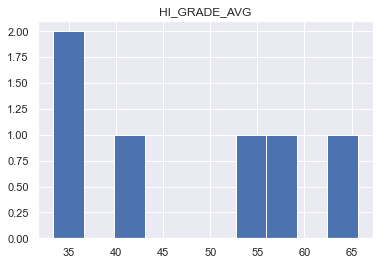

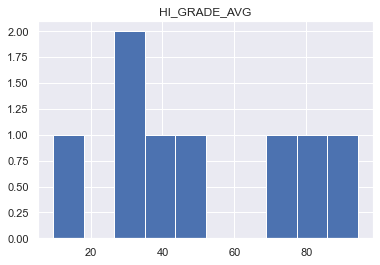

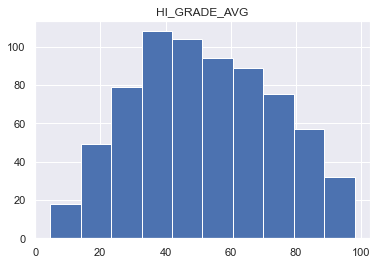

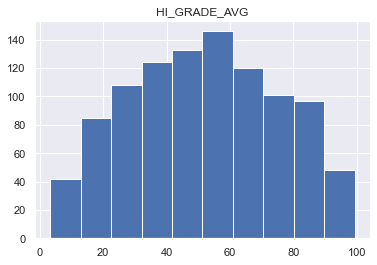

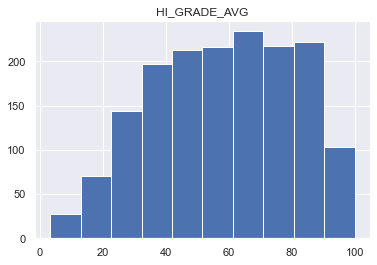

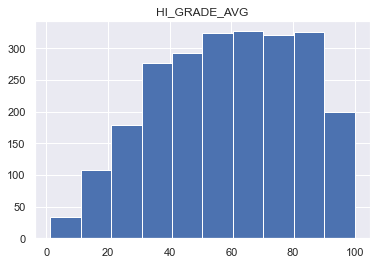

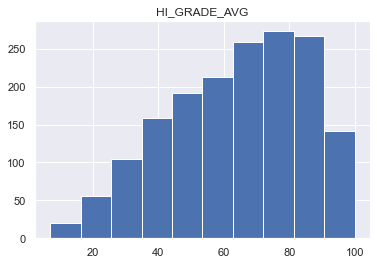

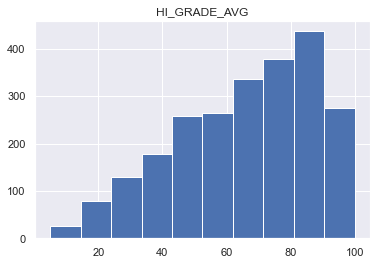

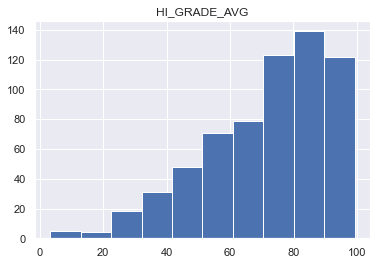

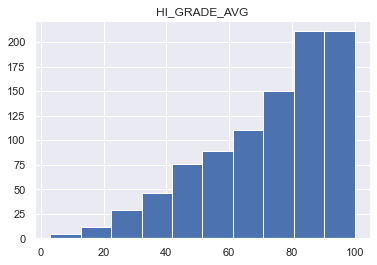

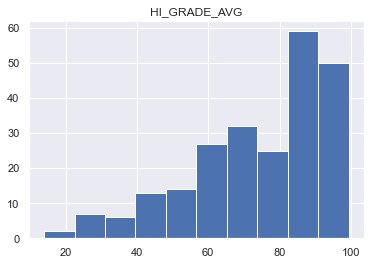

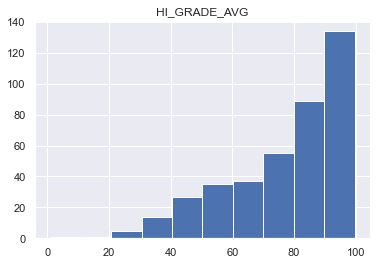

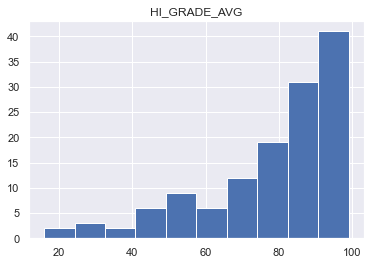

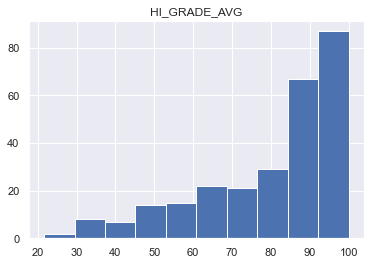

In [12]:
df[["STRATUM","GENDER", "HI_GRADE_AVG"]].groupby(["STRATUM", "GENDER"]).hist()

#### For each university's SEL_IHE,
plot distribution

In [13]:
df_group = df[["SEL_IHE", "CR_PRO", "CC_PRO", "ENG_PRO"]].groupby(["SEL_IHE"]).mean()

In [15]:
df_group.head()

,CR_PRO,CC_PRO,ENG_PRO
SEL_IHE,,,
1,54.934037,51.914688,51.183817
2,58.970960,56.037816,62.806789
3,64.613909,59.629496,72.786571
4,73.811664,71.184250,86.253715


#### Overall correlation, to see which data to look for

In [6]:
df['Cod_SPro'].nunique()

12395

In [38]:
df['SEL_IHE'].value_counts()

2    7748
4    2692
1    1137
3     834
Name: SEL_IHE, dtype: int64

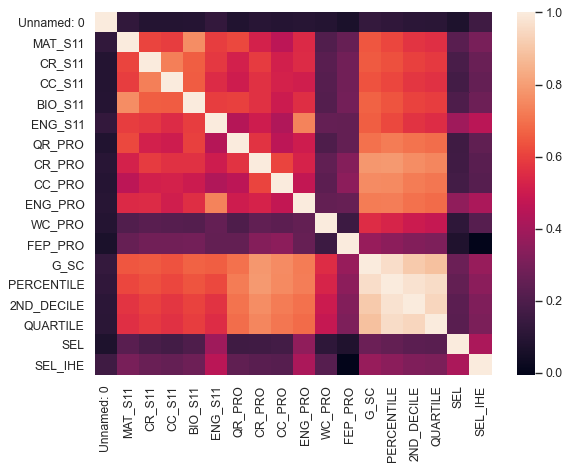

In [11]:
figure(figsize=(8, 6), dpi=80)
sns.heatmap(df.corr());

#### Testing correlation between socioeconomic level (sns) and socioeconomic level of the Institution of higher education

In [8]:
#correlation
df['SEL'].corr(df['SEL_IHE'])

0.4215563172046026

<AxesSubplot:>

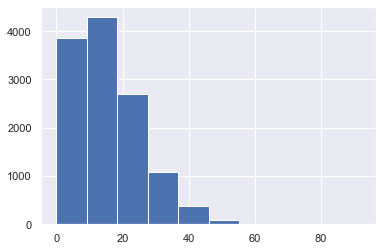

In [8]:
#plot to see which direction the people with sel goes. 
df['diff_ENG'] = abs(df['ENG_S11']-df['ENG_PRO'])
df['diff_ENG'].hist()

<AxesSubplot:>

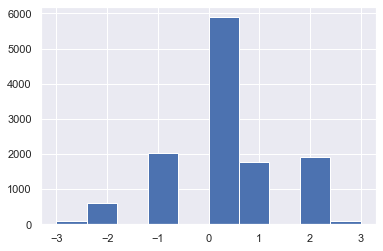

In [97]:
#plot to see which direction the people with sel goes. 
df['diff_SEL_SEL_IHE'] = df['SEL']-df['SEL_IHE']
df['diff_SEL_SEL_IHE'].hist()

#prøv at lave til stack

In [113]:
df_plot = df.groupby(['diff_SEL_SEL_IHE', 'SEL']).size().reset_index().pivot(columns='SEL', index='diff_SEL_SEL_IHE', values=0)

<AxesSubplot:xlabel='diff_SEL_SEL_IHE'>

<Figure size 640x480 with 0 Axes>

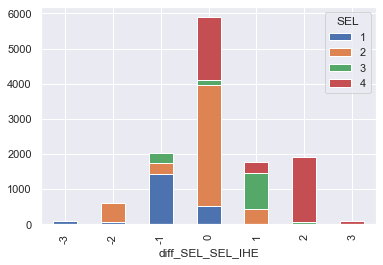

In [114]:
figure(figsize=(8, 6), dpi=80)
df_plot.plot(kind='bar', stacked=True)

In [115]:
df.SEL.value_counts()

2    4742
4    4040
1    2138
3    1491
Name: SEL, dtype: int64

In [29]:
#create column with n occurences of combination, to plot a bubble chart
count_series = df.groupby(['SEL', 'SEL_IHE']).size()
df2 = count_series.to_frame(name = 'size').reset_index()
df2[:5]

,SEL,SEL_IHE,size
0,1,1,514
1,1,2,1444
2,1,3,79
3,1,4,101
4,2,1,447


<AxesSubplot:xlabel='SEL', ylabel='SEL_IHE'>

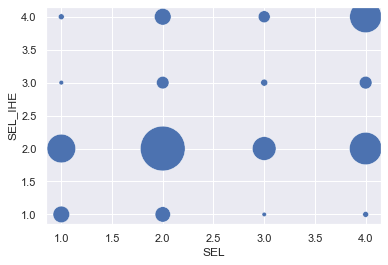

In [26]:
# Plotting bubble chart to see number of occurences for each combination
sns.scatterplot(data=df2, x="SEL", y="SEL_IHE", size="size",legend=False, sizes=(20, 2000))

### Stratum, sisben and socioeconomic level

In [87]:
# new columns for stratum and sisben with int values
df["STRATUM"].replace({'Stratum 4':4, 'Stratum 5':5, 'Stratum 2':2, 'Stratum 6':6, 'Stratum 3':3,
       'Stratum 1':1, '0':0}, inplace=True)

df["SISBEN"].replace({'It is not classified by the SISBEN':None, 'Level 2':2, 'Level 1':1, 'Esta clasificada en otro Level del SISBEN':4, 'Level 3':3, '0':0}, inplace=True)


In [91]:
df["STRATUM"].value_counts()

3    4045
2    4029
1    1709
4    1578
5     633
6     403
0      14
Name: STRATUM, dtype: int64

In [90]:
df["SISBEN"].value_counts()

0    7555
2    2120
1    2057
3     583
4      96
Name: SISBEN, dtype: int64

<AxesSubplot:>

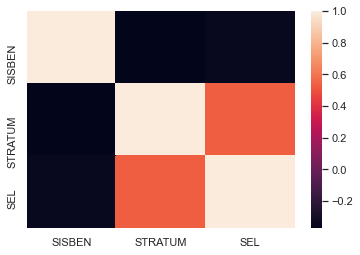

In [89]:
corr_df = df[["SISBEN","STRATUM", "SEL" ]]
sns.heatmap(corr_df.corr())

In [78]:
df["STRATUM"]

0        4
1        5
2        2
3        2
4        4
        ..
12406    2
12407    2
12408    2
12409    3
12410    3
Name: STRATUM, Length: 12411, dtype: int64